# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy import stats
from scipy.stats import t as ta
import statsmodels.stats.api as sms


df = pd.read_csv('./EDA_data/human_body_temperature.csv')

In [2]:
males = df[df["gender"] == 'M']
females = df[df["gender"] == 'F']

In [3]:
# here we must assume sample sigma = population sigma
t = df.temperature.values
t_m = males.temperature.values
t_f = females.temperature.values
mu = 98.6

### Is the distribution of body temperatures normal?
Ans: The distribution seems to be approaching normal distribution.

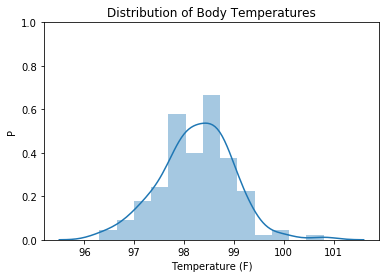

In [4]:
sns.distplot(t)
plt.ylim(0,1)
plt.xlabel("Temperature (F)")
plt.ylabel("P")
plt.title("Distribution of Body Temperatures")

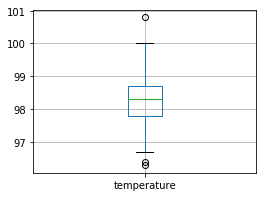

In [5]:

# Box plot of FSIQ and PIQ (different measures od IQ)
plt.figure(figsize=(4, 3))
df.boxplot(column=['temperature'])


### Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
Answer: There is no sample size requirement as the theorem only states that as a research pools more data from a population the data will approach a normal distribution with a center at the mean. Even though the sample size isn't millions of rows the size of this dataset is big enough for a test statistic. These observations are independent if and only if one observation does not effect the probability of another occurence. So, these observations are independent.

In [6]:
n = len(t)
print("Size of sample set is {}".format(n))

Size of sample set is 130


In [17]:
"""
methods
"""
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def diff_mean(data, mu=mu):
    return np.mean(data) - mu

def draw_bs_reps(data, func=np.mean, mu=0, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, 1 + n)/ n

    return x, y


### Hypothesis Testing: Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test: The use of resampled data to perform statistical inference
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
We use a one sample test since we have one feature set and are comparing it to one value : Mu = 98.6
* In this situation, is it appropriate to use the  t  or  z  statistic? t test because we are only modeling the mean parameter.
* Now try using the other test. How is the result be different? Why? P-Value. The result should also confirm the t test

In [18]:
# hypothesis testing H_o: Mu = x_bar, H_a: Mu not = x_bar
x_bar = np.mean(t)
var = np.var(t)/n
mu = 98.6
# One sample test: vector and expected value in null hypothesis
a = 0.05
stat, p = stats.ttest_1samp(t, mu)
sem = np.std(t) / np.sqrt(len(t))
# for a bootstrap we shift the vector and center it at the H_o to visualize it
new_t = t - x_bar + mu
new_t
d_mean = x_bar - mu
t_o, po = stats.ttest_1samp(t, mu)
# generate bootstrap reps: simulate 
bs_reps = draw_bs_reps(new_t, diff_mean, size=10000)
bs_r = draw_bs_reps(t, np.mean, size=10000)
# p value: if p < a then there is a significate difference
t_obs, p = stats.ttest_1samp(bs_reps, mu)  
t_crit = ta.ppf(1 - 0.025, len(bs_reps) - 1)
# resample What is a bootstrap replicate? : A single value of a statistic computed from a bootstrap sample.
bs_mu = np.mean(bs_reps)
# 0.95 confidence interval
ci = np.percentile(bs_reps, [2.5, 97.5])
bs_sem = np.std(bs_reps) / np.sqrt(len(bs_reps))

In [19]:
print("Original sample: t > t critical value? {}. p > alpha? {}".format(t_o > t_crit, po > a))

Original sample: t > t critical value? False. p > alpha? False


In [21]:
print("resample mean: {} \nconfidence interval: {} \nstnd error of mean: {}".format(bs_mu,ci, bs_sem))

resample mean: -0.0003086923076731594 
confidence interval: [-0.12615385  0.12461538] 
stnd error of mean: 0.0006401528690539382


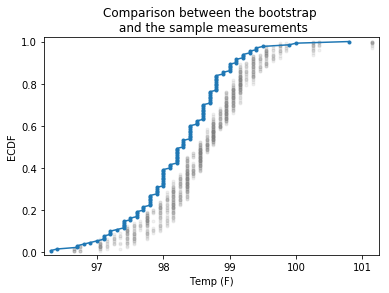

In [22]:
# bootstrap replicate
#
for _ in range(10):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(new_t, size=n)

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(t)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Temp (F)')
_ = plt.ylabel('ECDF')
_ = plt.title("Comparison between the bootstrap \n and the sample measurements")

# Show the plot
plt.show()


In [25]:
print("Is p > alpha? {}. conclusion: reject ".format(p < a)  + \
      "the null hypothesis which \nindicates that the observed mean is different than the accepted mean. \n"+\
      "Is t > t crit? {}. conclusion: reject the null hypothesis.".format(abs(t_obs) > t_crit))

Is p > alpha? True. conclusion: reject the null hypothesis which 
indicates that the observed mean is different than the accepted mean. 
Is t > t crit? True. conclusion: reject the null hypothesis.


Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

#### At what temperature should we consider someone's temperature to be "abnormal"?
Any temperature more than 1 standard deviation away should be considered as an abnormal temperature.

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Any temperature more than ~0.2 away from 98.249 is an extreme temp according to the bootstrap 


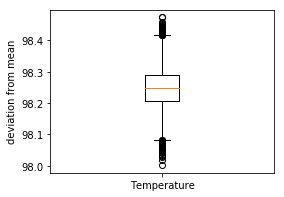

In [31]:
bs_r = draw_bs_reps(t, np.mean, size=10000)
# p value: if p < a then there is a significate difference
t_o, p = stats.ttest_1samp(bs_r, mu)  
t_crit = ta.ppf(1 - 0.025, len(bs_r)-1)
# resample What is a bootstrap replicate? : A single value of a statistic computed from a bootstrap sample.
bs_mu = np.mean(bs_r)
# 0.95 confidence interval
ci = np.percentile(bs_r, [2.5, 97.5])
print("Any temperature more than ~0.2 away from {} is an extreme temp according ".format(round(np.mean(bs_r), 3)) + \
      "to the bootstrap ")
# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(bs_r)
plt.xticks((1, ), ('Temperature', ))
plt.ylabel("deviation from mean")

plt.show()


#### Is there a significant difference between males and females in normal temperature? 
Yes
#### What testing approach did you use and why?
Two sample test because these are two independent sets of observation
#### Write a story with your conclusion in the context of the original problem.

In [40]:
# One sample test: vector and expected value in null hypothesis
a = 0.05
fbar = np.mean(t_f)
mbar = np.mean(t_m)

# generate bootstrap reps: simulate 
mbs = draw_bs_reps(t_m, np.mean, size=1000)
fbs = draw_bs_reps(t_f, np.mean, size=1000)

# p value: if p < a then there is a significate difference
tt, pp = stats.ttest_ind(mbs, fbs, equal_var=False)  
t_crit = ta.ppf(1 - 0.025, len(mbs)-1)

# 0.95 confidence interval
cm = sms.CompareMeans(sms.DescrStatsW(mbs), sms.DescrStatsW(fbs))

# System out
print("x_bar 1: {}, x_bar 2: {}".format(fbar, mbar))
print("Is t > crit? {}. So we fail to reject the null hypothesis".format(abs(tt) > t_crit))
print("Difference of means CI: {}".format(cm.tconfint_diff(alpha=a, usevar='unequal')))

x_bar 1: 98.39384615384614, x_bar 2: 98.10461538461537
Is t > crit? True. So we fail to reject the null hypothesis
Difference of means CI: (-0.29371437771707748, -0.2784733145905875)


If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [42]:
print("Is p < alpha? {}. conclusion: reject ".format(pp < a)  + \
      "the null hypothesis which \nindicates a difference in expected temperature between" +\
      "men and women. \n"+\
      "Is t > alpha? {}. conclusion: reject the null hypothesis.".format(abs(tt) > t_crit))

Is p < alpha? True. conclusion: reject the null hypothesis which 
indicates a difference in expected temperature betweenmen and women. 
Is t > alpha? True. conclusion: reject the null hypothesis.
